                                                                                               Hurgland-Nick KELIET

### Skills added :  
 >- Machine Learning 
 >- Generation of a Dataset
 >- SGDRegressor (SKlearn)
 >- LinearRegression (SKlearn)
 >- Gradient Boosting Regressor
 >- Learning curve

                                        REGRESSION LINEAIRE AVEC NUMPY

# Chargement des librairies

In [1]:
# Numpy
import numpy as np

# Générer un data set avec des valeur aléatoires
from sklearn.datasets import make_regression

#Créer des graphes et visualiser nos données avec Matplotlib 
# Affiche la bibliothèque graphique intégré à Notebook
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Stochastic Gradient Descent Regressor, qui calcule:
# La fonction Coût, des gradients et l'algo de minimisation
from sklearn.linear_model import SGDRegressor, LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Génération d'un Dataset

- dataset : (x,y) avec *m* exemples, n variables

In [2]:
# Make_regression nous permet de générer des données 2 tableaux que on va nommée x et y
# (nombre de tableau) = make_regression(nombre d'échantillons, nombre de features ou var dépendantes et bruit)
x,y = make_regression(n_samples = 100,n_features = 1, noise = 10)

- observation du dataset

# Implémentation du modèle linéaire
 - Observation du dataset

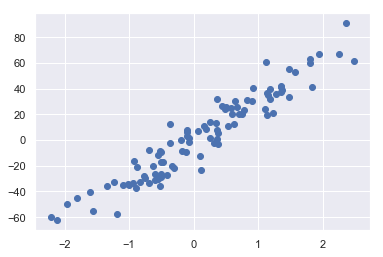

In [3]:
# plt.scatter(abscisse, ordonées)
plt.scatter(x,y)

# Méthode 1 : ------------------------------  Avec SGDRegressor  ------------------------------

### Train models 

In [4]:
# Entrainons notre model
model = SGDRegressor(max_iter= 100, eta0=0.01)
model.fit(x,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

### Machine Learning et Coefficient de détermination

- Evaluer la performance de notre modèle en utilisant le coefficient de détermination
    - Plus il est proche de 1, plus il rentre bien dans notre point

Coeff R2 : 0.9078015585159241
Interception : [-0.52336255]


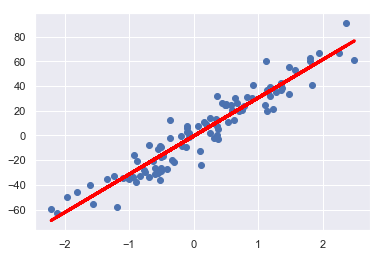

In [5]:
# Observons la précision de notre modèle en observons la précision de notre modèle
print("Coeff R2 :", model.score(x,y))

# L'ordonnée à l'origine
print("Interception :", model.intercept_)

# Notre Graphe
plt.scatter(x,y)

#Notre graphe
plt.plot(x,model.predict(x), c='red', lw=3)

# !!!!!! Résulat catastrophique que nous devons régler
# Repartons entrainer le model en Changeons le Learning Rate à 0.01 qui marche le mieux

# Méthode 2 : ----------------------------  Avec LinearRegression  ----------------------------

### Train model

In [6]:
# Initialize Linear Regression to a variable Linear
linear = LinearRegression()

# Entrainons notre model
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Coefficient de détermination et Interception

In [7]:
print("Score R2 :", linear.score(x,y))
print("Interception :", linear.intercept_)

Score R2 : 0.9078016908066848
Interception : -0.5291018619176118


### Graphe et Prédiction de notre modèle

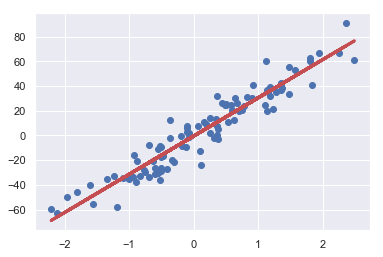

In [8]:
plt.scatter(x,y)
plt.plot(x,model.predict(x), c='r', lw=3)

## Conclusion 

- The accuracy of the model is lower than our aim of 85. So how do we achieve that 85% target ?
    - No it's ok for our model because is upper than our aim of 85. we have 93% !!! So don't need to use gradient boosting regression

# If the model wasn't upper than our aim:

# Gradient Boosting Regressor

In [9]:
# Importation de la librairie Sklearn Gradient Boost
from sklearn import ensemble

# variable where we define our gradient boosting regressor and set parameters to it , here
# Fit regression model
params = {'n_estimators': 400, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

# NB: n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model

In [10]:
# Affectons nous variable x et y à x_train et y_train
x_train = x
y_train = y 

# Entrainons notre modèle avec le Gradient boost
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# Evaluons notre modèle Rsquare
print("Score R2 = ", clf.score(x_train,y_train))
y_pred = model.predict(x)

Score R2 =  0.9999994950089405


 - R2 =  Notre modèle décrit 99 % des variations du prix de y 

In [12]:
# Importons les métriques
from sklearn.metrics import mean_squared_error,r2_score

# Mean Square Error
mse = mean_squared_error(y, clf.predict(x_train))
print(" Mean square error est %.4f:" % mse)


# compute test set deviance
t_sc = np.zeros((params['n_estimators']),dtype = np.float64)

 Mean square error est 0.0006:


In [13]:
for i,y_pred in enumerate(clf.staged_predict(x)):
    t_sc[i]=clf.loss_(y,y_pred)

In [14]:
testsc = np.arange((params['n_estimators']))+1

# Courbe d'apprentissage
- Vérifier si la machine réussit à bien apprendre

Text(0, 0.5, 'Deviance')

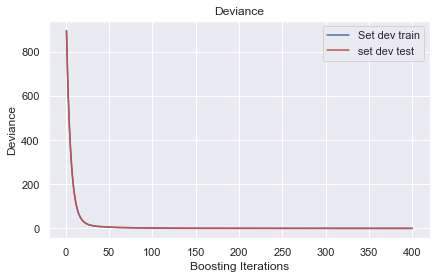

In [15]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


                                                                                                                    FIN